In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('indian movies.csv')

# Clean and preprocess the data

# Convert 'Year' to numeric, forcing errors to NaN (missing values).
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Clean 'Timing(min)' by removing non-numeric values and converting to numeric
df['Timing(min)'] = df['Timing(min)'].str.replace(r'\D', '', regex=True)  # Replace non-digits with empty string
df['Timing(min)'] = pd.to_numeric(df['Timing(min)'], errors='coerce')

# Convert 'Rating(10)' to numeric, ignoring invalid ones
df['Rating(10)'] = pd.to_numeric(df['Rating(10)'], errors='coerce')

# Split genres by ',' and explode the rows for each genre
df['Genre'] = df['Genre'].replace('-', np.nan)  # Replace missing values represented by '-'
df_genres = df.dropna(subset=['Genre']).copy()
df_genres['Genre'] = df_genres['Genre'].str.split(', ')
df_genres = df_genres.explode('Genre')

df.head()

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
0,tt0398974,Dr. Shaitan,1960.0,NaN,NaN,-,NaN,hindi
1,tt1702558,Nadir Khan,1968.0,NaN,NaN,-,NaN,urdu
2,tt0493437,Apna Sapna Money Money,2006.0,134.0,5.3,"1,892","Comedy, Musical, Romance",hindi
3,tt0273405,Aag Aur Sholay,1987.0,NaN,2.2,20,NaN,urdu
4,tt0049595,Parivar,1956.0,NaN,7.4,21,"Comedy, Drama, Family",hindi


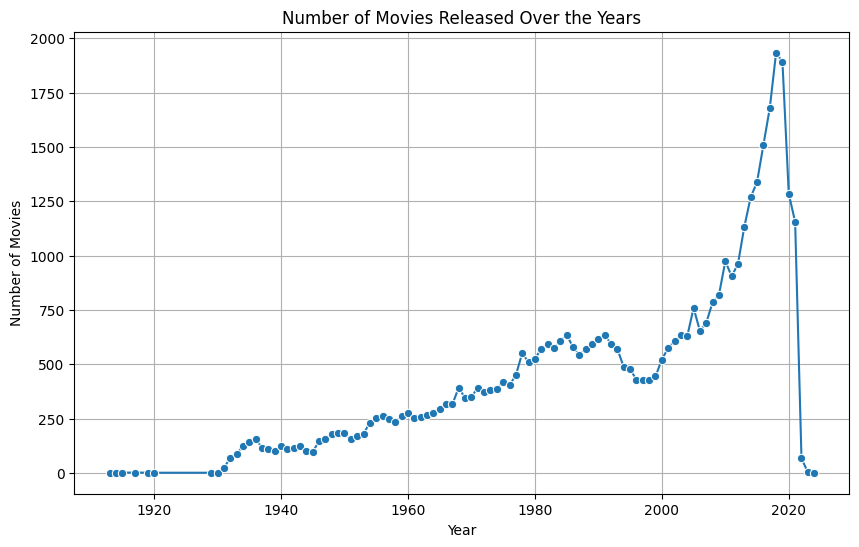

In [3]:
# 1. Release Year Line Plot
plt.figure(figsize=(10,6))
df_year = df.groupby('Year').size().reset_index(name='Count')
sns.lineplot(x='Year', y='Count', data=df_year, marker='o')
plt.title('Number of Movies Released Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()



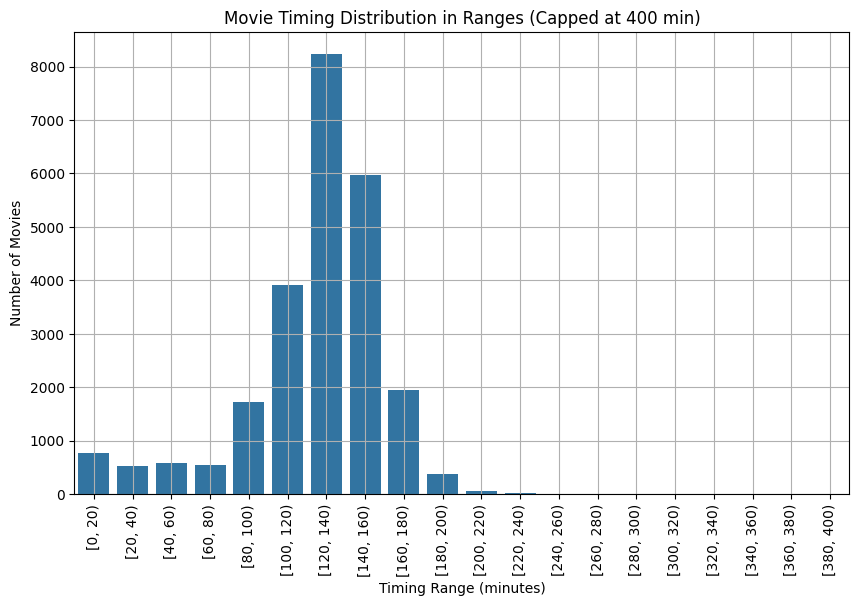

In [4]:
# 2. Timing Bar Graph (with ranges of 20 min)
plt.figure(figsize=(10,6))
timing_bins = pd.cut(df['Timing(min)'], bins=[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400], right=False)
timing_counts = timing_bins.value_counts(sort=False).reset_index(name='Count')
timing_counts['Range'] = timing_counts.iloc[:, 0].astype(str)  # Access the first column after reset_index()
sns.barplot(x='Range', y='Count', data=timing_counts)
plt.xticks(rotation=90)
plt.title('Movie Timing Distribution in Ranges (Capped at 400 min)')
plt.xlabel('Timing Range (minutes)')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()


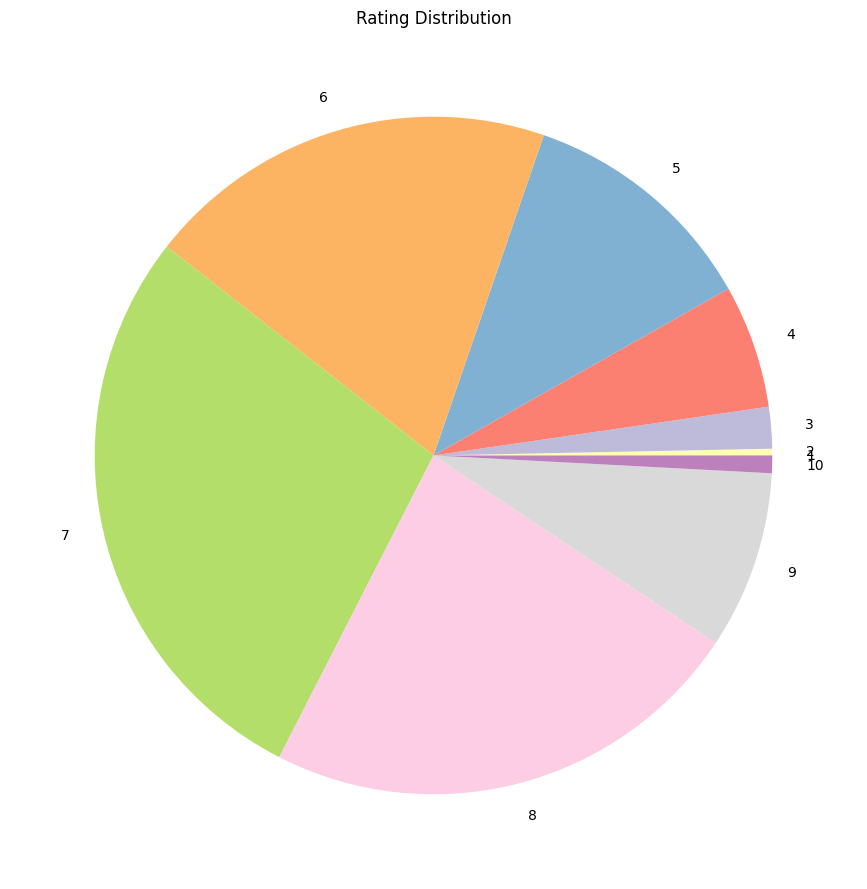

In [5]:
# 3. Rating Pie Chart (categorize into 1, 2, 3, 4, 5, 6+ ratings)
plt.figure(figsize=(11,11))
rating_bins = pd.cut(df['Rating(10)'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], labels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])
rating_counts = rating_bins.value_counts(sort=False)
rating_counts.plot.pie(colors=sns.color_palette('Set3'))
plt.title('Rating Distribution')
plt.ylabel('')
plt.show()

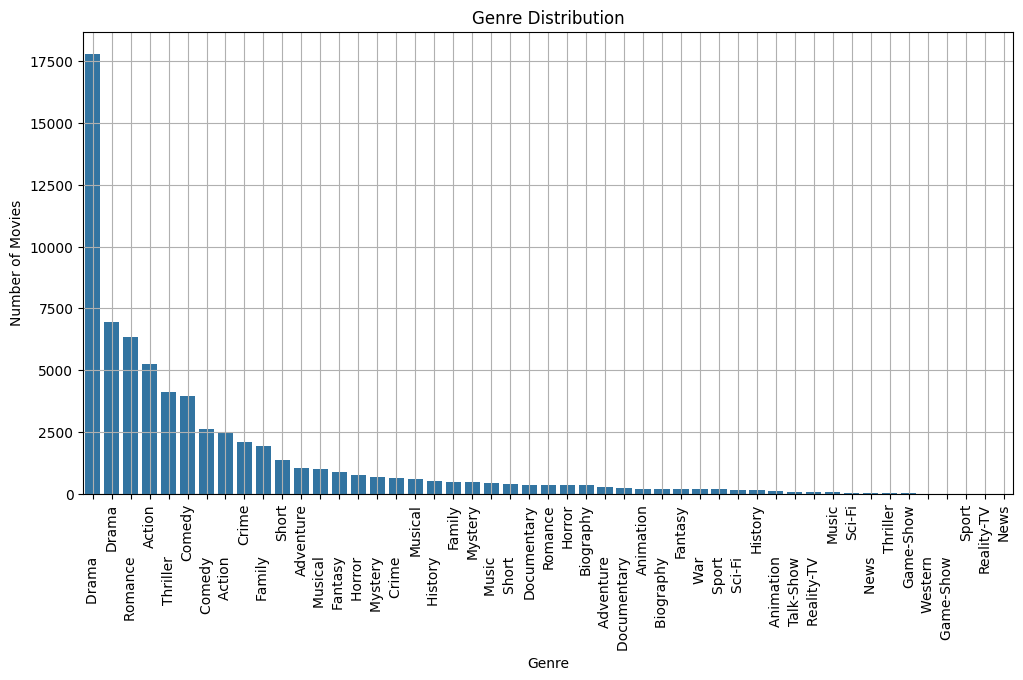

In [6]:
# 4. Genre Bar Chart (since treemap is not available in Jupyter by default)
plt.figure(figsize=(12,6))
genre_counts = df_genres['Genre'].value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.xticks(rotation=90)
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()
